In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing

## Using the pts 313

In [3]:
ptsFile = '/content/drive/MyDrive/Image Colorization/resources/pts313.npy'

In [4]:
q_ab = np.load(ptsFile)

In [5]:
q_ab

array([[ -90,   50],
       [ -90,   60],
       [ -90,   70],
       [ -90,   80],
       [ -90,   90],
       [ -80,   20],
       [ -80,   30],
       [ -80,   40],
       [ -80,   50],
       [ -80,   60],
       [ -80,   70],
       [ -80,   80],
       [ -80,   90],
       [ -70,    0],
       [ -70,   10],
       [ -70,   20],
       [ -70,   30],
       [ -70,   40],
       [ -70,   50],
       [ -70,   60],
       [ -70,   70],
       [ -70,   80],
       [ -70,   90],
       [ -60,  -20],
       [ -60,  -10],
       [ -60,    0],
       [ -60,   10],
       [ -60,   20],
       [ -60,   30],
       [ -60,   40],
       [ -60,   50],
       [ -60,   60],
       [ -60,   70],
       [ -60,   80],
       [ -60,   90],
       [ -50,  -30],
       [ -50,  -20],
       [ -50,  -10],
       [ -50,    0],
       [ -50,   10],
       [ -50,   20],
       [ -50,   30],
       [ -50,   40],
       [ -50,   50],
       [ -50,   60],
       [ -50,   70],
       [ -50,   80],
       [ -50,

In [10]:
q_ab.shape

(313, 2)

In [11]:
x = q_ab[:,0]
y = q_ab[:,1]

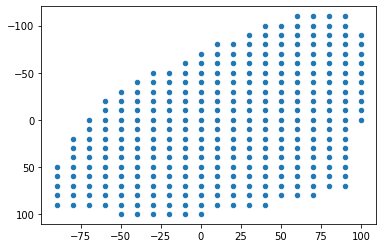

In [12]:
plt.scatter(x, y, s=20)
plt.gca().invert_yaxis()
plt.show()

In [13]:
std = preprocessing.StandardScaler()

In [14]:
scaled = std.fit_transform(q_ab)

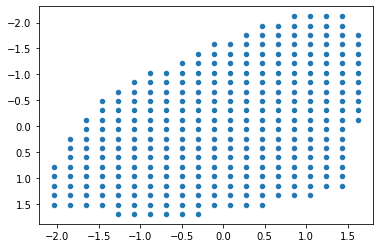

In [15]:
plt.scatter(scaled[:,0], scaled[:,1], s=20)
plt.gca().invert_yaxis()
plt.show()

## Using Normalization Concept

In [16]:
GRID_SIZE = (20,20)
_a = np.linspace(0, 1, num=GRID_SIZE[0], endpoint=False) + 1/(2*GRID_SIZE[0])
_b = np.linspace(0, 1, num=GRID_SIZE[1], endpoint=False) + 1/(2*GRID_SIZE[1])
ab_lookup = np.transpose([np.tile(_a, len(_b)), np.repeat(_b, len(_a))])

In [17]:
_a

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

In [18]:
_b

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

In [19]:
ab_lookup

array([[0.025, 0.025],
       [0.075, 0.025],
       [0.125, 0.025],
       [0.175, 0.025],
       [0.225, 0.025],
       [0.275, 0.025],
       [0.325, 0.025],
       [0.375, 0.025],
       [0.425, 0.025],
       [0.475, 0.025],
       [0.525, 0.025],
       [0.575, 0.025],
       [0.625, 0.025],
       [0.675, 0.025],
       [0.725, 0.025],
       [0.775, 0.025],
       [0.825, 0.025],
       [0.875, 0.025],
       [0.925, 0.025],
       [0.975, 0.025],
       [0.025, 0.075],
       [0.075, 0.075],
       [0.125, 0.075],
       [0.175, 0.075],
       [0.225, 0.075],
       [0.275, 0.075],
       [0.325, 0.075],
       [0.375, 0.075],
       [0.425, 0.075],
       [0.475, 0.075],
       [0.525, 0.075],
       [0.575, 0.075],
       [0.625, 0.075],
       [0.675, 0.075],
       [0.725, 0.075],
       [0.775, 0.075],
       [0.825, 0.075],
       [0.875, 0.075],
       [0.925, 0.075],
       [0.975, 0.075],
       [0.025, 0.125],
       [0.075, 0.125],
       [0.125, 0.125],
       [0.1

In [20]:
ab_lookup.shape

(400, 2)

In [21]:
X = ab_lookup[:,0]
Y = ab_lookup[:,1]

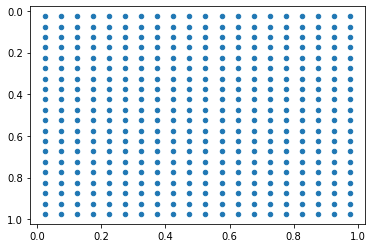

In [22]:
plt.scatter(X,Y, s=20)
plt.gca().invert_yaxis()
plt.show()

In [23]:
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from sklearn.neighbors import NearestNeighbors

from scipy.ndimage import zoom

In [24]:
import tensorflow as tf

In [25]:
tf.executing_eagerly()

True

In [26]:
img = imread('/content/test11.jpg')

In [27]:
img.shape

(1500, 1000, 3)

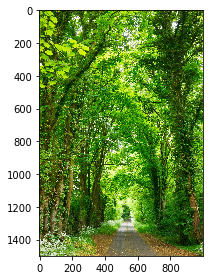

In [28]:
imshow(img)

In [29]:
img = resize(img, (256,256))

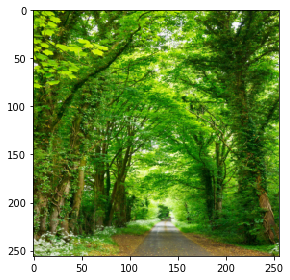

In [30]:
imshow(img)

In [31]:
lab = rgb2lab(img)

In [32]:
ab = lab[:,:,1:]

In [33]:
ab.shape

(256, 256, 2)

In [34]:
in_out_ratio = 2
vec_size = len(ab_lookup)

In [35]:
vec_size

400

In [36]:
# neigbors configuration
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean').fit(ab_lookup)

In [37]:
def gaussian(x, sig):
    return np.exp(-np.power(x, 2.) / (2 * np.power(sig, 2.)))

In [71]:
def encode_sparse(color_channels):

        print(color_channels.shape)
        # sample down to output size
        a = zoom(color_channels[0], 1/in_out_ratio)
        print(f'a zoom : {a.shape}')
        b = zoom(color_channels[1], 1/in_out_ratio)
        print(f'b zoom : {b.shape}')
        color_channels = np.array([a, b])
        print(f'color_channel shape : {color_channels.shape}')

        height, width = a.shape[0], a.shape[1]
        dense_shape = (height, width, vec_size)
        indices, values = [], []
        for y in range(height):
            
            for x in range(width):
                print(x)
                # get actual a,b values
                ab = np.array([[color_channels[0][y, x], color_channels[1][y, x]]])
                # find the 5 closest a,b values from the grid
                distances, ab_indices = nbrs.kneighbors(ab)
                vector = np.zeros((vec_size))
                # find weights for each of the 5 closest points
                weights = [gaussian(d, 3) for d in distances[0]]
                sum_weights = sum(weights)
                
                indices += [[x, y, i] for i in ab_indices[0]]
                values += [w / sum_weights for w in weights]

        labels = np.zeros(shape=dense_shape)
        for idx, val in zip(indices, values):
            labels[idx] = val
        # print(labels.shape)
        # labels = tf.SparseTensor(
        #     indices=tf.constant(indices, dtype=tf.int64), 
        #     values=tf.constant(values, dtype=tf.float32), 
        #     dense_shape=tf.constant(dense_shape, dtype=tf.int64))
        # # return tf.sparse_reorder(labels)
        return labels

def encode(color_channels):
    # assert tf.executing_eagerly()
    sparse_labels = encode_sparse(color_channels)
    # return tf.sparse_tensor_to_dense(sparse_labels).numpy()
    return sparse_labels

In [72]:
en = encode(ab)

(256, 256, 2)
a zoom : (128, 1)
b zoom : (128, 1)
color_channel shape : (2, 128, 1)
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [64]:
en

array([[[0.1773632 , 0.1773632 , 0.1773632 , ..., 0.1773632 ,
         0.1773632 , 0.1773632 ]],

       [[0.20116658, 0.20116658, 0.20116658, ..., 0.20116658,
         0.20116658, 0.20116658]],

       [[0.17656187, 0.17656187, 0.17656187, ..., 0.17656187,
         0.17656187, 0.17656187]],

       ...,

       [[0.17600316, 0.17600316, 0.17600316, ..., 0.17600316,
         0.17600316, 0.17600316]],

       [[0.1731987 , 0.1731987 , 0.1731987 , ..., 0.1731987 ,
         0.1731987 , 0.1731987 ]],

       [[0.1773632 , 0.1773632 , 0.1773632 , ..., 0.1773632 ,
         0.1773632 , 0.1773632 ]]])

In [57]:
en.shape

(128, 1, 400)

In [73]:
import keras

In [74]:
class ColorNetBuilder:
    def __init__(self, input_shape, 
                    output_dimensions=400,
                    initial_num_filters=64,
                    num_poolings=0,
                    kernel_size=3,
                    dropout_rate=0.2,
                    batch_normalization=True):
        self.output_dimensions = output_dimensions
        self.input_shape = input_shape
        self.kernel_size = kernel_size
        self.dropout_rate = dropout_rate
        self.batch_normalization = batch_normalization

        self.activation = 'relu'
        self.padding = 'same'
        self.kernel_initializer = 'glorot_uniform'

        self.model_name = 'u-net'

    def conv2d_layer(self, inputs, num_filters=None, kernel_size=None, activation=None, strides=None):
        """
        builds a custom 2d convolutional layer based on the current configuration.
        """
        kernel_size = self.kernel_size if (kernel_size == None) else kernel_size
        num_filters = self.initial_num_filters if (num_filters == None) else num_filters
        activation = self.activation if (activation == None) else activation
        strides = (1, 1) if (strides == None) else strides

        x = keras.layers.Conv2D(num_filters, kernel_size, 
                                    padding=self.padding, 
                                    kernel_initializer=self.kernel_initializer, 
                                    strides=strides)(inputs)
        return keras.layers.LeakyReLU(alpha=0.02)(x)

    def build_downsampling_block(self, inputs, num_filters, stride=1):
        """
        builds a block in the downsampling phase of the net.
        It consists of 2 Conv2D layers with batch normalization and max pooling in the end.
        The result before pooling is also returned, to pass it on to the upsampling phase
        """
        x = self.conv2d_layer(inputs, num_filters=num_filters)
        x = self.conv2d_layer(x, num_filters=num_filters, strides=(stride, stride))
        x = keras.layers.Dropout(rate=self.dropout_rate)(x)
        return keras.layers.BatchNormalization()(x) if (self.batch_normalization) else x

    def build_upsampling_block(self, inputs, num_filters):
        """
        builds a block in the upsampling phase of the net.
        It consists of one Deconvolution (upsampling) layer with
        concatenation of inputs from an earlier step and two Conv2D layers
        """
        x = keras.layers.UpSampling2D(size = (2,2))(inputs)
        x = self.conv2d_layer(x, num_filters=num_filters)
        x = self.conv2d_layer(x, num_filters=num_filters)
        x = keras.layers.Dropout(rate=self.dropout_rate)(x)
        return keras.layers.BatchNormalization()(x) if (self.batch_normalization) else x

    def build_output_block(self, inputs, num_filters):
        x = self.conv2d_layer(inputs, num_filters=num_filters)
        return keras.layers.Conv2D(self.output_dimensions, self.kernel_size,
                                    activation='softmax', 
                                    padding=self.padding, 
                                    kernel_initializer=self.kernel_initializer, 
                                    strides=(1,1))(x)

    def build_model_core(self):
        """
        builds the core of the u-net model with the downsampling and upsampling stages
        """
        self.inputs = keras.Input(shape=self.input_shape, name='bw-img')
        
        x = self.build_downsampling_block(self.inputs, 64, 2)  #128x128
        x = self.build_downsampling_block(x, 128, 2) #64x64
        x = self.build_downsampling_block(x, 256, 2) #32x32
        x = self.build_downsampling_block(x, 512, 1) #32x32
        x = self.build_downsampling_block(x, 512, 1) #32x32

        x = self.build_upsampling_block(x, 256)      #64x64
        x = self.build_upsampling_block(x, 128)      #128x128
        self.outputs = self.build_output_block(x, 256)          #128x128

    def instanciate_model(self):
        return keras.Model(inputs=self.inputs, outputs=self.outputs, name=self.model_name)

    def calculate_output_shape(self, input_shape):
        assert input_shape[0] % 2 == 0
        assert input_shape[1] % 2 == 0
        return (int(input_shape[0]/2), int(input_shape[1]/2), self.outputs.shape[-1].value)

    def build_model(self):
        self.build_model_core()
        return self.instanciate_model()

In [75]:
model = ColorNetBuilder((256,256,1))

In [78]:
net = model.build_model()

In [79]:
net.summary()

Model: "u-net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bw-img (InputLayer)         [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 256, 256, 64)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 dropout_7 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_7 (Batc  (None, 128, 128, 64)     256   